In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# In CSV file, the first row is a header which tells us what are the fields - column names
d0 = pd.read_csv('./mnist_train.csv') # reading the file

print(d0.head(5)) # print first 5 rows of d0.

# The first column tells what are the digits it is representing. 
# The rest of the 784 columns indexed from pixel0 to pixel783.

# l stores all the class labels - save the variables into a variable l.
l = d0['label']

# d stores all the data - Drop the label feature and store the pixel data in d.
d = d0.drop("label", axis=1)

# d[i] ---> l[i], if we take iᵗʰ row of d, the corresponding label will be l[i]

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

In [7]:
print(d.shape)
print(l.shape)

(42000, 784)
(42000,)


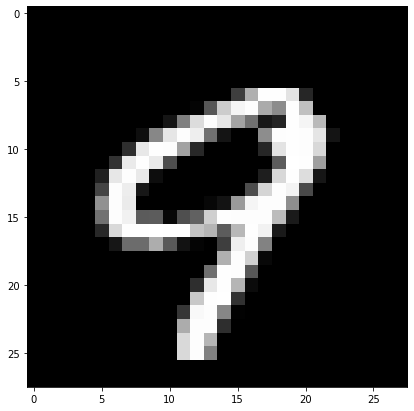

9


In [8]:
# display or plot a number
plt.figure(figsize=(7, 7))
idx = 100  

grid_data = d.iloc[idx].to_numpy().reshape(28, 28)  # reshape 1-D to 2-D

#matplotlib has a function called image show(); cmap - color map
plt.imshow(grid_data, interpolation="none", cmap="gray") 
plt.show()

print(l[idx])   # in l-vector 100 value is 9

<h6>2D Visualization using PCA </h6>

In [9]:
# Pick the first 15k data-points to work on for time-efficiency.
labels = l.head(15000)
data = d.head(15000)

print("The shape of the sample data = ", data.shape)

# All the 42k data-points to work on for time-efficiency.
#labels = l.head(42000)
#data = d.head(42000)

#print("The shape of the sample data = ", data.shape)

The shape of the sample data =  (15000, 784)


In [10]:
# Data-preprocessing: Standardizing the data

from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)

(15000, 784)


In [11]:
# Find the co-variance matrix which is A^T * T
sample_data = standardized_data

# matrix multiplication using numpy
covar_matrix = np.matmul(sample_data.T, sample_data)

print("The shape of the co-variance matrix = ", covar_matrix.shape)

The shape of the co-variance matrix =  (784, 784)


C:\Users\Snehashish\AppData\Local\Temp\ipykernel_11700\3820705322.py:5: RuntimeWarning: invalid value encountered in matmul
  covar_matrix = np.matmul(sample_data.T, sample_data)


In [12]:
# find the 2 Eigen vectors corresponding to top 2 Eigen values for projecting onto 2-D space
# In scipy linear algebra import a function 'eigh'
from scipy.linalg import eigh

# the parameter 'eighvals' is defined (low value to high value)
# eigh function will return Eigen values in ascending order
# this code generates only the top 2 (782 and 783) eigen values.
values, vectors = eigh(covar_matrix, eigvals=(782, 783))

print("The shape of the Eigen vectors = ",vectors.shape)
# Converting the Eigen vectors into (2,d) shape for easyness of further computation
vectors = vectors.T


print("Updated shape of the Eigen vectors = ",vectors.shape)
# here vectors[1] represents the eigen vector corresponding 1ˢᵗ principal
# here vectors[2] represents the eigen vector corresponding 2ⁿᵈ principal

C:\Users\Snehashish\AppData\Local\Temp\ipykernel_11700\4220834706.py:8: DeprecationWarning: Keyword argument 'eigvals' is deprecated in favour of 'subset_by_index' keyword instead and will be removed in SciPy 1.12.0.
  values, vectors = eigh(covar_matrix, eigvals=(782, 783))


The shape of the Eigen vectors =  (784, 2)
Updated shape of the Eigen vectors =  (2, 784)


In [13]:
# projecting the original data sample on the plane
# formed by two principal Eigen vectors by vector-vector multiplication

import matplotlib.pyplot as plt
new_coordinates = np.matmul(vectors, sample_data.T)

print("Resultant new data points' shape ", vectors.shape, "X", sample_data.T.shape, " = ", new_coordinates.shape)

Resultant new data points' shape  (2, 784) X (784, 15000)  =  (2, 15000)


In [14]:
import pandas as pd

# appending label to the 2-D projected data
new_coordinates = np.vstack((new_coordinates, labels)).T

# creating a new data frame for plotting the labeled points.
dataframe = pd.DataFrame(data=new_coordinates, columns=("1ˢᵗ principal", "2ⁿᵈ principal", "label"))
print(dataframe.head())

   1ˢᵗ principal  2ⁿᵈ principal  label
0      -5.558661      -5.043558    1.0
1       6.193635      19.305278    0.0
2      -1.909878      -7.678775    1.0
3       5.525748      -0.464845    4.0
4       6.366527      26.644289    0.0


c:\Users\Snehashish\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


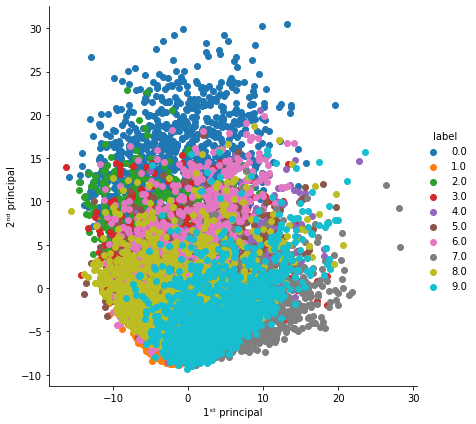

In [18]:
# Plotting the 2D data points with seaborn

import seaborn as sn
sn.FacetGrid(dataframe, hue="label", height= 6).map(plt.scatter,"1ˢᵗ principal", "2ⁿᵈ principal").add_legend()
plt.show()

<h2>PCA using Scikit-Learn</h2>

In [25]:
# initializing the PCA
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn import decomposition
pca = decomposition.PCA()

In [26]:
# Configuring the parameters
# The number of parameters = 2

pca = decomposition.PCA()
pca.n_components = 2
pca_data = pca.fit_transform(sample_data)

#pca_reduced will contain the 2-D projects of the sample data
print("shape of pca_reduced.shape = ", pca_data.shape)

shape of pca_reduced.shape =  (15000, 2)


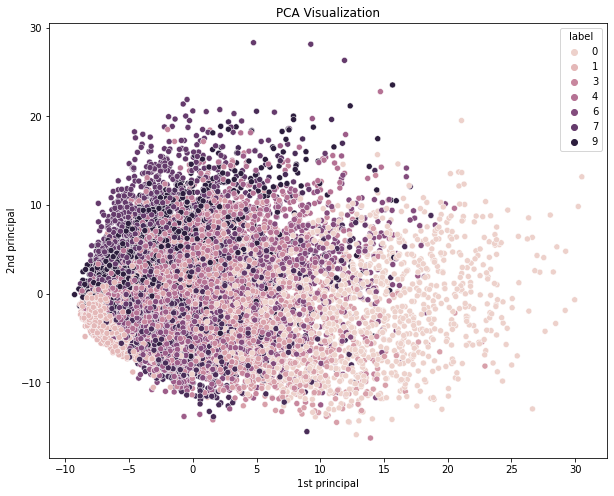

In [27]:
pca_df = pd.DataFrame(data=pca_data, columns=["1st principal", "2nd principal"])

# Adding the 'label' column
pca_df["label"] = labels  # Replace 'labels' with your actual label data

# Creating a scatter plot using Seaborn
plt.figure(figsize=(10, 8))
sn.scatterplot(x="1st principal", y="2nd principal", hue="label", data=pca_df)
plt.title("PCA Visualization")
plt.show()